In [7]:
#Import Libraries
import glob
from tensorflow.keras.models import Sequential, load_model
import numpy as np
import pandas as pd
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import tensorflow.keras as k 
import warnings; warnings.simplefilter('ignore')
#warnings.filterwarnings('ignore')

In [8]:
#load data using Pandas.‘df’ stands for dataframe. 
#Pandas reads in the csv file as a dataframe. 
df = pd.read_csv("kidney_disease.csv")
    

In [3]:
#The ‘head()’ function will show the first 5 rows of the dataframe 
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
#Find the shape of dataframe
df.shape

(400, 26)

In [6]:
# df info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
id                400 non-null int64
age               391 non-null float64
bp                388 non-null float64
sg                353 non-null float64
al                354 non-null float64
su                351 non-null float64
rbc               248 non-null object
pc                335 non-null object
pcc               396 non-null object
ba                396 non-null object
bgr               356 non-null float64
bu                381 non-null float64
sc                383 non-null float64
sod               313 non-null float64
pot               312 non-null float64
hemo              348 non-null float64
pcv               330 non-null object
wc                295 non-null object
rc                270 non-null object
htn               398 non-null object
dm                398 non-null object
cad               398 non-null object
appet             399 non-null object
pe         

In [25]:
cat_col=['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']
# check the number of unique values
df[cat_col].apply(lambda x: x.nunique(), axis=0)

rbc      2
pc       2
pcc      2
ba       2
htn      2
dm       5
cad      3
appet    2
pe       2
ane      2
dtype: int64

In [26]:
# Problem found on df['dm'], string has extra space
df['dm'].unique()

array(['yes', 'no', ' yes', '\tno', '\tyes', nan], dtype=object)

In [27]:
df['dm'].dtype

dtype('O')

In [28]:
# delete the space
df['dm'] = df['dm'].str.strip()
#If this space is not deleted it will result in mismatch in X_train and X_test

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023EECD1CE48>,
      dtype=object)

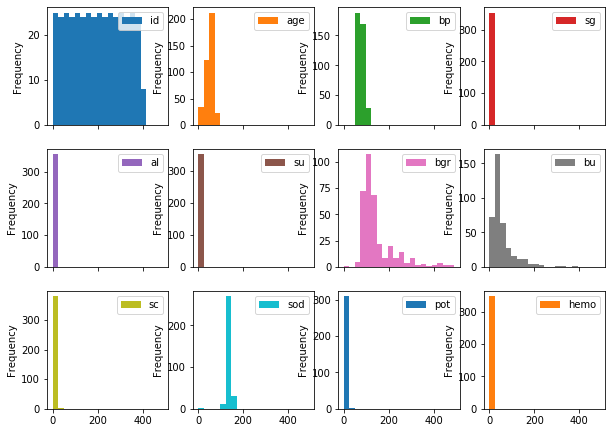

In [29]:
#Plot histogram
df.plot.hist(subplots=True, layout=(4,4), figsize=(10, 10), bins=20)

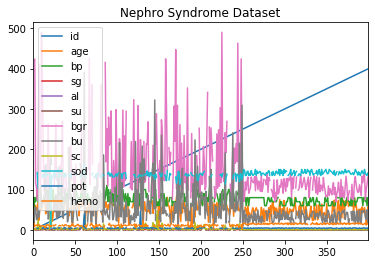

In [30]:
#Line graph
df.drop(["classification"], axis=1).plot.line(title='Nephro Syndrome Dataset')

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

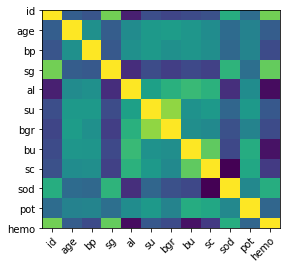

In [31]:
#Correlation Matrix -table showing coefficients of correlation between variables
import numpy as np

# get correlation matrix
corr = df.corr()
fig, ax = plt.subplots()
# create heatmap
im = ax.imshow(corr.values)

# set labels
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

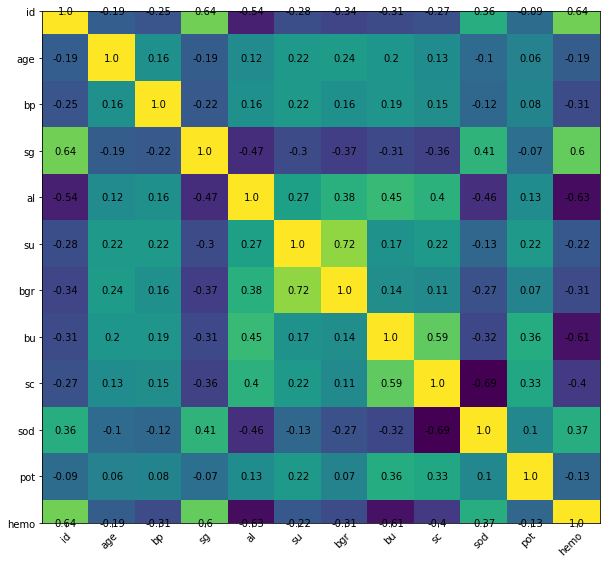

In [32]:
#Heat Map with correlation values
# get correlation matrix
corr = df.corr()
fig, ax = plt.subplots(figsize=(10,10))
# create heatmap
im = ax.imshow(corr.values)

# set labels
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        text = ax.text(j, i, np.around(corr.iloc[i, j], decimals=2),
                       ha="center", va="center", color="black")

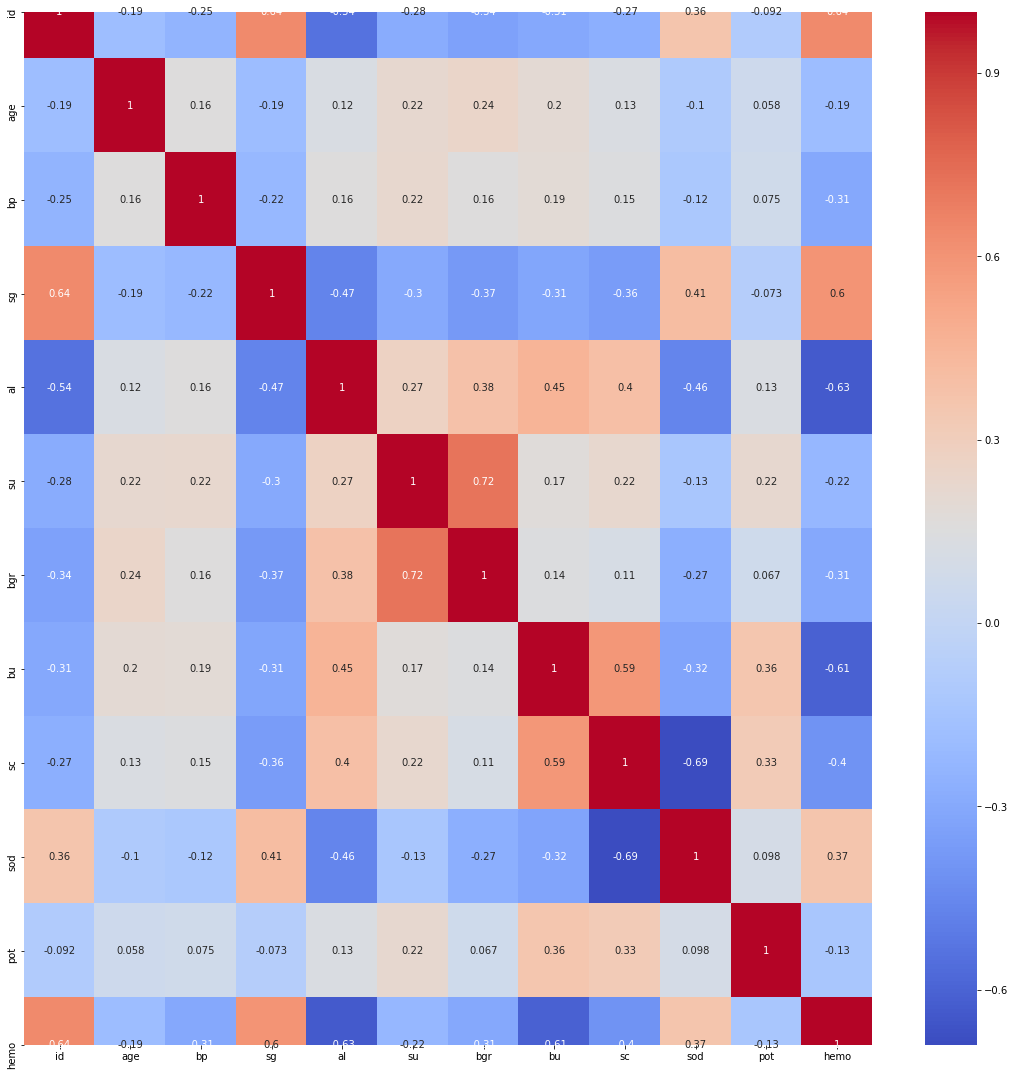

In [13]:
#Heat map using Seaborn library
import seaborn as sns
plt.figure(figsize=(19,19))
sns.heatmap(df.corr(), annot=True,cmap = 'coolwarm')
# looking for strong correlations with "class" row

In [33]:
#Based on heat map,freeze columns to retain
columns_to_retain = ["sg", "al", "sc", "hemo","bu",
                         "pcv", "wbcc", "rbcc", "htn", "classification"]

#Drop other columns that are not in columns_to_retain
df = df.drop([col for col in df.columns if not col in columns_to_retain], axis=1)
    
# Drop the rows with na or missing values
df = df.dropna(axis=0)

In [34]:
#Transform non-numeric columns into numerical columns
for column in df.columns:
        if df[column].dtype == np.number:
            continue
        df[column] = LabelEncoder().fit_transform(df[column])

In [35]:
#first 5 rows of the dataset after transformation and cleasing of data
df.head()

,sg,al,bu,sc,hemo,pcv,htn,classification
0,1.020,1.0,36.0,1.2,15.4,28,1,0
1,1.020,4.0,18.0,0.8,11.3,22,0,0
2,1.010,2.0,53.0,1.8,9.6,15,0,0
3,1.005,4.0,56.0,3.8,11.2,16,1,0
4,1.010,2.0,26.0,1.4,11.6,19,0,0


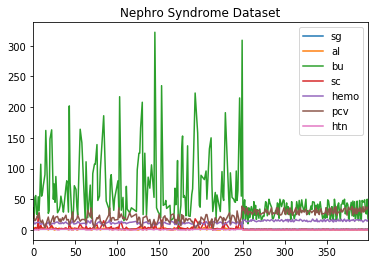

In [36]:
#dataframe  after filtering on the required columns
df.drop(["classification"], axis=1).plot.line(title='Nephro Syndrome Dataset')

In [37]:
#Final shape of dataset after cleaning
df.shape

(285, 8)

In [38]:
#To investigate individual attributes
df['pcv'].value_counts()

36    19
25    19
28    19
32    17
24    15
29    11
18    11
20    11
17    11
27    10
26    10
34    10
16    10
21    10
30     8
13     8
12     8
15     8
14     7
23     7
10     6
19     6
8      5
38     4
31     4
33     4
35     4
22     3
11     3
37     3
6      3
9      2
7      2
3      1
1      1
2      1
39     1
4      1
5      1
0      1
Name: pcv, dtype: int64

In [39]:
#Investigate classification attribute distribution
df['classification'].value_counts()

0    154
1    131
Name: classification, dtype: int64

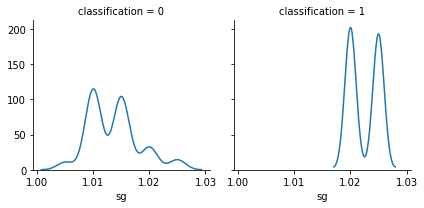

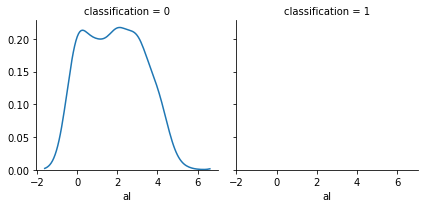

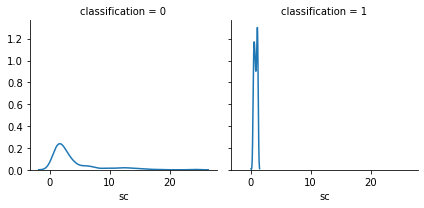

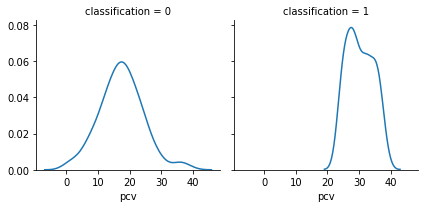

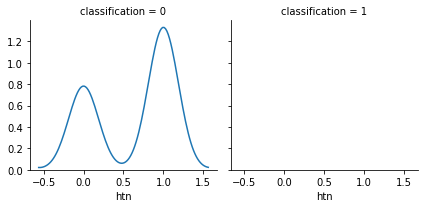

In [41]:
#Faceting
import seaborn as sns
g = sns.FacetGrid(df, col='classification')
g = g.map(sns.kdeplot, 'sg')
g = sns.FacetGrid(df, col='classification')
g = g.map(sns.kdeplot, 'al')
g = sns.FacetGrid(df, col='classification')
g = g.map(sns.kdeplot, 'sc')
g = sns.FacetGrid(df, col='classification')
g = g.map(sns.kdeplot, 'pcv')
g = sns.FacetGrid(df, col='classification')
g = g.map(sns.kdeplot, 'htn')

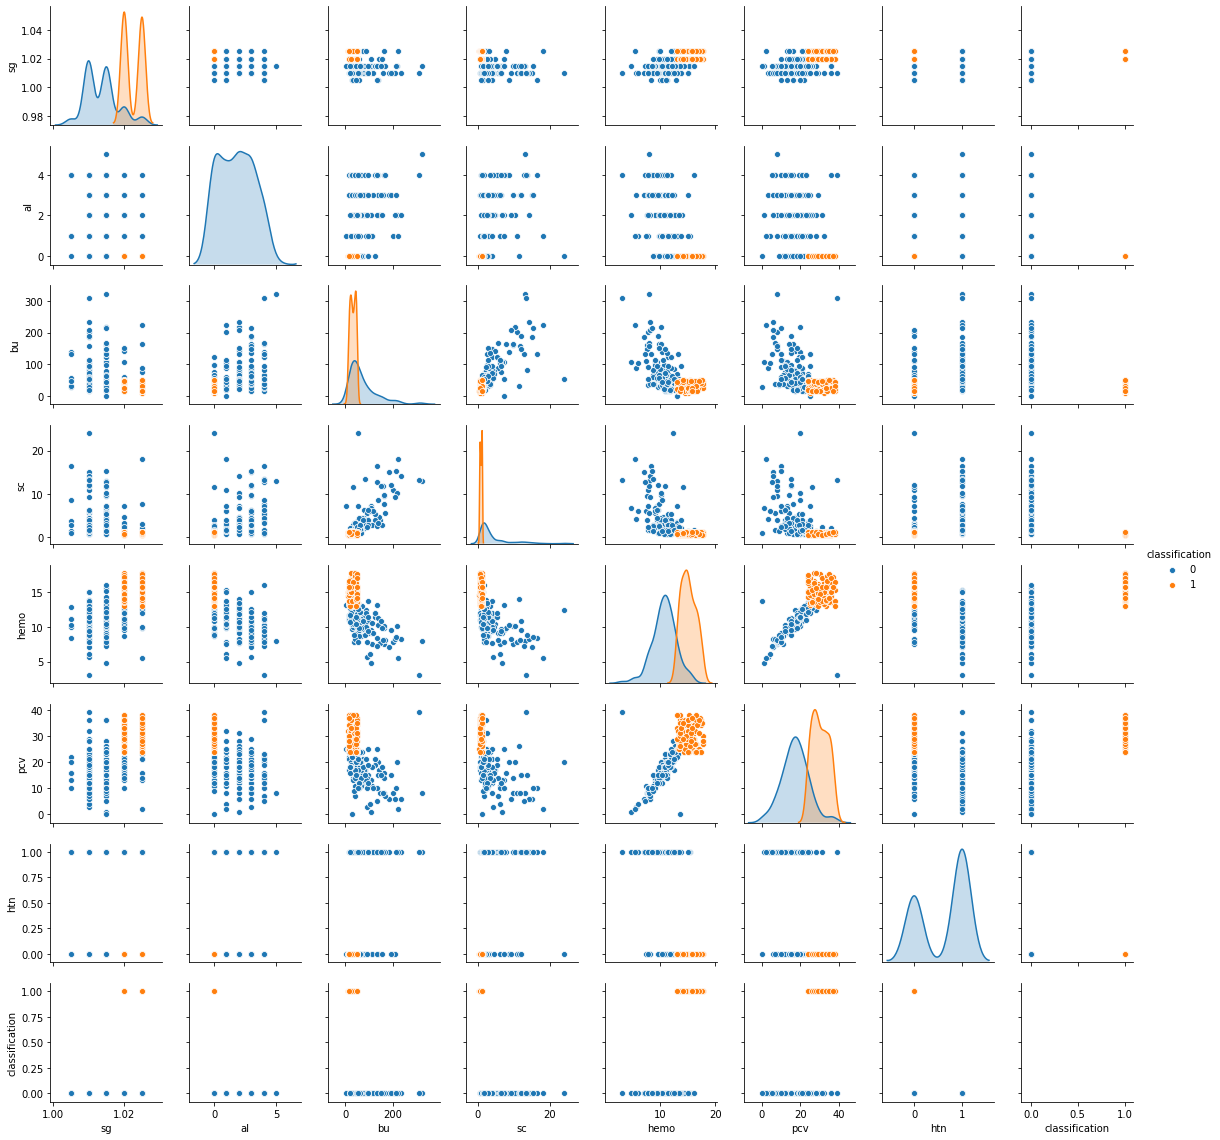

In [42]:
# Bivariate Pairwise relationships between columns with seaborn library
sns.pairplot(df, hue="classification", size=2, diag_kind="kde")

In [43]:
#X is the independent variable(i.e features) and Y is dependent variable(target) 
X = df.drop(["classification"], axis=1)
y = df["classification"]

In [44]:
#Feature Scaling
#the min-max scaler method scales the dataset so that all the input features lie between 0 and 1 inclusive
x_scaler = MinMaxScaler()
x_scaler.fit(X)
column_names = X.columns
X[column_names] = x_scaler.transform(X)

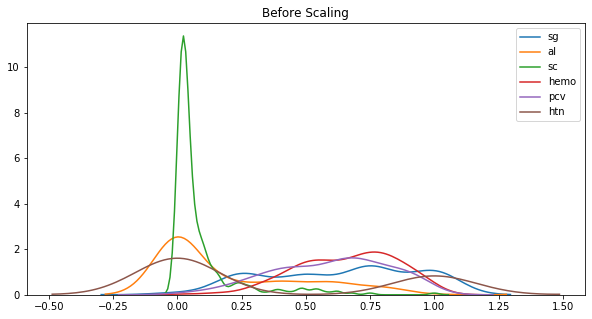

In [45]:
# Before & After Mean normalization
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(X['sg'], ax=ax1)
sns.kdeplot(X['al'], ax=ax1)
sns.kdeplot(X['sc'], ax=ax1)
sns.kdeplot(X['hemo'], ax=ax1)
sns.kdeplot(X['pcv'], ax=ax1)
sns.kdeplot(X['htn'], ax=ax1)

In [46]:
#Split the data as Training(80%) and Test(20%)
X_train,  X_test, y_train, y_test = train_test_split(
        X, y, test_size= 0.2, shuffle=True)

In [47]:
#Build The model
#8D is converted into 256D
#256D to 1 D
model = Sequential()
model.add(Dense(256, input_dim=len(X.columns),
                    kernel_initializer=k.initializers.he_normal(seed=13), activation="relu"))
model.add(Dense(1, activation="hard_sigmoid"))

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               2048      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 2,305
Trainable params: 2,305
Non-trainable params: 0
_________________________________________________________________


In [48]:
from keras.layers import Dense

Using TensorFlow backend.


In [49]:
#Compile the model

model.compile(loss='binary_crossentropy', 
                  optimizer='adam', metrics=['accuracy'])

In [50]:
#Train the model
history = model.fit(X_train, y_train, 
                    epochs=2000, #The number of iterations over the entire dataset to train on
                    batch_size=X_train.shape[0]) #The number of samples per gradient update for training

Epoch 1/2000
228/228 [==============================] - 0s 745us/sample - loss: 0.5695 - acc: 0.7675
Epoch 2/2000
228/228 [==============================] - 0s 13us/sample - loss: 0.5551 - acc: 0.7763
Epoch 3/2000
228/228 [==============================] - 0s 48us/sample - loss: 0.5411 - acc: 0.7895
Epoch 4/2000
228/228 [==============================] - 0s 22us/sample - loss: 0.5274 - acc: 0.8202
Epoch 5/2000
228/228 [==============================] - 0s 17us/sample - loss: 0.5139 - acc: 0.8553
Epoch 6/2000
228/228 [==============================] - 0s 39us/sample - loss: 0.5008 - acc: 0.8596
Epoch 7/2000
228/228 [==============================] - 0s 13us/sample - loss: 0.4879 - acc: 0.8684
Epoch 8/2000
228/228 [==============================] - 0s 35us/sample - loss: 0.4752 - acc: 0.8684
Epoch 9/2000
228/228 [==============================] - 0s 13us/sample - loss: 0.4628 - acc: 0.8772
Epoch 10/2000
228/228 [==============================] - 0s 9us/sample - loss: 0.4506 - acc: 0.8772

Epoch 83/2000
228/228 [==============================] - 0s 13us/sample - loss: 0.1264 - acc: 0.9518
Epoch 84/2000
228/228 [==============================] - 0s 39us/sample - loss: 0.1251 - acc: 0.9518
Epoch 85/2000
228/228 [==============================] - 0s 17us/sample - loss: 0.1239 - acc: 0.9518
Epoch 86/2000
228/228 [==============================] - 0s 13us/sample - loss: 0.1227 - acc: 0.9518
Epoch 87/2000
228/228 [==============================] - 0s 13us/sample - loss: 0.1214 - acc: 0.9518
Epoch 88/2000
228/228 [==============================] - 0s 18us/sample - loss: 0.1203 - acc: 0.9518
Epoch 89/2000
228/228 [==============================] - 0s 9us/sample - loss: 0.1191 - acc: 0.9518
Epoch 90/2000
228/228 [==============================] - 0s 17us/sample - loss: 0.1179 - acc: 0.9561
Epoch 91/2000
228/228 [==============================] - 0s 13us/sample - loss: 0.1168 - acc: 0.9561
Epoch 92/2000
228/228 [==============================] - 0s 9us/sample - loss: 0.1157 - acc:

Epoch 164/2000
228/228 [==============================] - 0s 13us/sample - loss: 0.0698 - acc: 0.9605
Epoch 165/2000
228/228 [==============================] - 0s 13us/sample - loss: 0.0694 - acc: 0.9605
Epoch 166/2000
228/228 [==============================] - 0s 22us/sample - loss: 0.0689 - acc: 0.9605
Epoch 167/2000
228/228 [==============================] - 0s 13us/sample - loss: 0.0685 - acc: 0.9605
Epoch 168/2000
228/228 [==============================] - 0s 22us/sample - loss: 0.0681 - acc: 0.9605
Epoch 169/2000
228/228 [==============================] - 0s 9us/sample - loss: 0.0678 - acc: 0.9605
Epoch 170/2000
228/228 [==============================] - 0s 13us/sample - loss: 0.0674 - acc: 0.9605
Epoch 171/2000
228/228 [==============================] - 0s 22us/sample - loss: 0.0670 - acc: 0.9605
Epoch 172/2000
228/228 [==============================] - 0s 13us/sample - loss: 0.0667 - acc: 0.9605
Epoch 173/2000
228/228 [==============================] - 0s 13us/sample - loss: 0.

Epoch 245/2000
228/228 [==============================] - 0s 9us/sample - loss: 0.0513 - acc: 0.9693
Epoch 246/2000
228/228 [==============================] - 0s 44us/sample - loss: 0.0512 - acc: 0.9693
Epoch 247/2000
228/228 [==============================] - 0s 13us/sample - loss: 0.0510 - acc: 0.9693
Epoch 248/2000
228/228 [==============================] - 0s 9us/sample - loss: 0.0509 - acc: 0.9693
Epoch 249/2000
228/228 [==============================] - 0s 22us/sample - loss: 0.0507 - acc: 0.9693
Epoch 250/2000
228/228 [==============================] - 0s 13us/sample - loss: 0.0506 - acc: 0.9693
Epoch 251/2000
228/228 [==============================] - 0s 22us/sample - loss: 0.0504 - acc: 0.9693
Epoch 252/2000
228/228 [==============================] - 0s 26us/sample - loss: 0.0503 - acc: 0.9693
Epoch 253/2000
228/228 [==============================] - 0s 13us/sample - loss: 0.0501 - acc: 0.9693
Epoch 254/2000
228/228 [==============================] - 0s 13us/sample - loss: 0.0

Epoch 326/2000
228/228 [==============================] - 0s 9us/sample - loss: 0.0402 - acc: 0.9737
Epoch 327/2000
228/228 [==============================] - 0s 31us/sample - loss: 0.0401 - acc: 0.9737
Epoch 328/2000
228/228 [==============================] - 0s 15us/sample - loss: 0.0399 - acc: 0.9737
Epoch 329/2000
228/228 [==============================] - 0s 13us/sample - loss: 0.0398 - acc: 0.9737
Epoch 330/2000
228/228 [==============================] - 0s 22us/sample - loss: 0.0397 - acc: 0.9737
Epoch 331/2000
228/228 [==============================] - 0s 13us/sample - loss: 0.0396 - acc: 0.9737
Epoch 332/2000
228/228 [==============================] - 0s 9us/sample - loss: 0.0394 - acc: 0.9737
Epoch 333/2000
228/228 [==============================] - 0s 26us/sample - loss: 0.0393 - acc: 0.9737
Epoch 334/2000
228/228 [==============================] - 0s 13us/sample - loss: 0.0392 - acc: 0.9737
Epoch 335/2000
228/228 [==============================] - 0s 13us/sample - loss: 0.0

Epoch 407/2000
228/228 [==============================] - 0s 13us/sample - loss: 0.0317 - acc: 0.9825
Epoch 408/2000
228/228 [==============================] - 0s 13us/sample - loss: 0.0316 - acc: 0.9825
Epoch 409/2000
228/228 [==============================] - 0s 13us/sample - loss: 0.0316 - acc: 0.9825
Epoch 410/2000
228/228 [==============================] - 0s 26us/sample - loss: 0.0315 - acc: 0.9825
Epoch 411/2000
228/228 [==============================] - 0s 17us/sample - loss: 0.0314 - acc: 0.9825
Epoch 412/2000
228/228 [==============================] - 0s 13us/sample - loss: 0.0313 - acc: 0.9825
Epoch 413/2000
228/228 [==============================] - 0s 22us/sample - loss: 0.0312 - acc: 0.9825
Epoch 414/2000
228/228 [==============================] - 0s 9us/sample - loss: 0.0312 - acc: 0.9825
Epoch 415/2000
228/228 [==============================] - 0s 9us/sample - loss: 0.0311 - acc: 0.9825
Epoch 416/2000
228/228 [==============================] - 0s 22us/sample - loss: 0.0

Epoch 488/2000
228/228 [==============================] - 0s 35us/sample - loss: 0.0260 - acc: 0.9912
Epoch 489/2000
228/228 [==============================] - 0s 17us/sample - loss: 0.0260 - acc: 0.9912
Epoch 490/2000
228/228 [==============================] - 0s 13us/sample - loss: 0.0259 - acc: 0.9912
Epoch 491/2000
228/228 [==============================] - 0s 22us/sample - loss: 0.0258 - acc: 0.9912
Epoch 492/2000
228/228 [==============================] - 0s 13us/sample - loss: 0.0258 - acc: 0.9912
Epoch 493/2000
228/228 [==============================] - 0s 13us/sample - loss: 0.0257 - acc: 0.9912
Epoch 494/2000
228/228 [==============================] - 0s 22us/sample - loss: 0.0256 - acc: 0.9912
Epoch 495/2000
228/228 [==============================] - 0s 13us/sample - loss: 0.0256 - acc: 0.9912
Epoch 496/2000
228/228 [==============================] - 0s 13us/sample - loss: 0.0255 - acc: 0.9912
Epoch 497/2000
228/228 [==============================] - 0s 22us/sample - loss: 0

Epoch 569/2000
228/228 [==============================] - 0s 30us/sample - loss: 0.0209 - acc: 0.9912
Epoch 570/2000
228/228 [==============================] - 0s 17us/sample - loss: 0.0209 - acc: 0.9912
Epoch 571/2000
228/228 [==============================] - 0s 13us/sample - loss: 0.0208 - acc: 0.9912
Epoch 572/2000
228/228 [==============================] - 0s 17us/sample - loss: 0.0207 - acc: 0.9912
Epoch 573/2000
228/228 [==============================] - 0s 13us/sample - loss: 0.0207 - acc: 0.9912
Epoch 574/2000
228/228 [==============================] - 0s 13us/sample - loss: 0.0206 - acc: 0.9912
Epoch 575/2000
228/228 [==============================] - 0s 17us/sample - loss: 0.0206 - acc: 0.9912
Epoch 576/2000
228/228 [==============================] - 0s 13us/sample - loss: 0.0205 - acc: 0.9912
Epoch 577/2000
228/228 [==============================] - 0s 13us/sample - loss: 0.0205 - acc: 0.9912
Epoch 578/2000
228/228 [==============================] - 0s 22us/sample - loss: 0

Epoch 650/2000
228/228 [==============================] - 0s 13us/sample - loss: 0.0177 - acc: 0.9956
Epoch 651/2000
228/228 [==============================] - 0s 26us/sample - loss: 0.0177 - acc: 0.9912
Epoch 652/2000
228/228 [==============================] - 0s 8us/sample - loss: 0.0177 - acc: 0.9956
Epoch 653/2000
228/228 [==============================] - 0s 22us/sample - loss: 0.0177 - acc: 0.9956
Epoch 654/2000
228/228 [==============================] - 0s 17us/sample - loss: 0.0176 - acc: 0.9956
Epoch 655/2000
228/228 [==============================] - 0s 13us/sample - loss: 0.0176 - acc: 0.9956
Epoch 656/2000
228/228 [==============================] - 0s 30us/sample - loss: 0.0176 - acc: 0.9956
Epoch 657/2000
228/228 [==============================] - 0s 12us/sample - loss: 0.0175 - acc: 0.9956
Epoch 658/2000
228/228 [==============================] - 0s 13us/sample - loss: 0.0175 - acc: 0.9956
Epoch 659/2000
228/228 [==============================] - 0s 17us/sample - loss: 0.

Epoch 731/2000
228/228 [==============================] - 0s 13us/sample - loss: 0.0155 - acc: 0.9956
Epoch 732/2000
228/228 [==============================] - 0s 22us/sample - loss: 0.0155 - acc: 0.9956
Epoch 733/2000
228/228 [==============================] - 0s 18us/sample - loss: 0.0154 - acc: 0.9956
Epoch 734/2000
228/228 [==============================] - 0s 13us/sample - loss: 0.0154 - acc: 0.9956
Epoch 735/2000
228/228 [==============================] - 0s 22us/sample - loss: 0.0154 - acc: 0.9956
Epoch 736/2000
228/228 [==============================] - 0s 9us/sample - loss: 0.0153 - acc: 0.9956
Epoch 737/2000
228/228 [==============================] - 0s 13us/sample - loss: 0.0153 - acc: 0.9956
Epoch 738/2000
228/228 [==============================] - 0s 13us/sample - loss: 0.0153 - acc: 0.9956
Epoch 739/2000
228/228 [==============================] - 0s 9us/sample - loss: 0.0153 - acc: 0.9956
Epoch 740/2000
228/228 [==============================] - 0s 17us/sample - loss: 0.0

Epoch 812/2000
228/228 [==============================] - 0s 13us/sample - loss: 0.0133 - acc: 0.9956
Epoch 813/2000
228/228 [==============================] - 0s 39us/sample - loss: 0.0133 - acc: 0.9956
Epoch 814/2000
228/228 [==============================] - 0s 26us/sample - loss: 0.0133 - acc: 0.9956
Epoch 815/2000
228/228 [==============================] - 0s 18us/sample - loss: 0.0133 - acc: 0.9956
Epoch 816/2000
228/228 [==============================] - 0s 13us/sample - loss: 0.0132 - acc: 0.9956
Epoch 817/2000
228/228 [==============================] - 0s 13us/sample - loss: 0.0132 - acc: 0.9956
Epoch 818/2000
228/228 [==============================] - 0s 13us/sample - loss: 0.0132 - acc: 0.9956
Epoch 819/2000
228/228 [==============================] - 0s 17us/sample - loss: 0.0131 - acc: 0.9956
Epoch 820/2000
228/228 [==============================] - 0s 13us/sample - loss: 0.0131 - acc: 0.9956
Epoch 821/2000
228/228 [==============================] - 0s 17us/sample - loss: 0

Epoch 893/2000
228/228 [==============================] - 0s 22us/sample - loss: 0.0118 - acc: 0.9956
Epoch 894/2000
228/228 [==============================] - 0s 13us/sample - loss: 0.0118 - acc: 0.9956
Epoch 895/2000
228/228 [==============================] - 0s 35us/sample - loss: 0.0118 - acc: 0.9956
Epoch 896/2000
228/228 [==============================] - 0s 13us/sample - loss: 0.0118 - acc: 0.9956
Epoch 897/2000
228/228 [==============================] - 0s 13us/sample - loss: 0.0118 - acc: 0.9956
Epoch 898/2000
228/228 [==============================] - 0s 26us/sample - loss: 0.0118 - acc: 0.9956
Epoch 899/2000
228/228 [==============================] - 0s 13us/sample - loss: 0.0118 - acc: 0.9956
Epoch 900/2000
228/228 [==============================] - 0s 9us/sample - loss: 0.0118 - acc: 0.9956
Epoch 901/2000
228/228 [==============================] - 0s 17us/sample - loss: 0.0117 - acc: 0.9956
Epoch 902/2000
228/228 [==============================] - 0s 13us/sample - loss: 0.

Epoch 974/2000
228/228 [==============================] - 0s 9us/sample - loss: 0.0110 - acc: 0.9956
Epoch 975/2000
228/228 [==============================] - 0s 13us/sample - loss: 0.0110 - acc: 0.9956
Epoch 976/2000
228/228 [==============================] - 0s 9us/sample - loss: 0.0110 - acc: 0.9956
Epoch 977/2000
228/228 [==============================] - 0s 17us/sample - loss: 0.0110 - acc: 0.9956
Epoch 978/2000
228/228 [==============================] - 0s 9us/sample - loss: 0.0110 - acc: 0.9956
Epoch 979/2000
228/228 [==============================] - 0s 17us/sample - loss: 0.0110 - acc: 0.9956
Epoch 980/2000
228/228 [==============================] - 0s 13us/sample - loss: 0.0109 - acc: 0.9956
Epoch 981/2000
228/228 [==============================] - 0s 9us/sample - loss: 0.0109 - acc: 0.9956
Epoch 982/2000
228/228 [==============================] - 0s 13us/sample - loss: 0.0109 - acc: 0.9956
Epoch 983/2000
228/228 [==============================] - 0s 13us/sample - loss: 0.010

Epoch 1054/2000
228/228 [==============================] - 0s 16us/sample - loss: 0.0102 - acc: 0.9956
Epoch 1055/2000
228/228 [==============================] - 0s 13us/sample - loss: 0.0102 - acc: 0.9956
Epoch 1056/2000
228/228 [==============================] - 0s 26us/sample - loss: 0.0102 - acc: 0.9956
Epoch 1057/2000
228/228 [==============================] - 0s 17us/sample - loss: 0.0102 - acc: 0.9956
Epoch 1058/2000
228/228 [==============================] - 0s 13us/sample - loss: 0.0102 - acc: 0.9956
Epoch 1059/2000
228/228 [==============================] - 0s 17us/sample - loss: 0.0102 - acc: 0.9956
Epoch 1060/2000
228/228 [==============================] - 0s 13us/sample - loss: 0.0102 - acc: 0.9956
Epoch 1061/2000
228/228 [==============================] - 0s 9us/sample - loss: 0.0101 - acc: 0.9956
Epoch 1062/2000
228/228 [==============================] - 0s 26us/sample - loss: 0.0101 - acc: 0.9956
Epoch 1063/2000
228/228 [==============================] - 0s 18us/sample 

Epoch 1134/2000
228/228 [==============================] - 0s 13us/sample - loss: 0.0094 - acc: 0.9956
Epoch 1135/2000
228/228 [==============================] - 0s 13us/sample - loss: 0.0094 - acc: 0.9956
Epoch 1136/2000
228/228 [==============================] - 0s 26us/sample - loss: 0.0094 - acc: 0.9956
Epoch 1137/2000
228/228 [==============================] - 0s 13us/sample - loss: 0.0094 - acc: 0.9956
Epoch 1138/2000
228/228 [==============================] - 0s 13us/sample - loss: 0.0094 - acc: 0.9956
Epoch 1139/2000
228/228 [==============================] - 0s 9us/sample - loss: 0.0094 - acc: 0.9956
Epoch 1140/2000
228/228 [==============================] - 0s 13us/sample - loss: 0.0094 - acc: 0.9956
Epoch 1141/2000
228/228 [==============================] - 0s 26us/sample - loss: 0.0094 - acc: 0.9956
Epoch 1142/2000
228/228 [==============================] - 0s 17us/sample - loss: 0.0094 - acc: 0.9956
Epoch 1143/2000
228/228 [==============================] - 0s 13us/sample 

Epoch 1214/2000
228/228 [==============================] - 0s 17us/sample - loss: 0.0089 - acc: 0.9956
Epoch 1215/2000
228/228 [==============================] - 0s 9us/sample - loss: 0.0089 - acc: 0.9956
Epoch 1216/2000
228/228 [==============================] - 0s 18us/sample - loss: 0.0089 - acc: 0.9956
Epoch 1217/2000
228/228 [==============================] - 0s 26us/sample - loss: 0.0088 - acc: 0.9956
Epoch 1218/2000
228/228 [==============================] - 0s 9us/sample - loss: 0.0088 - acc: 0.9956
Epoch 1219/2000
228/228 [==============================] - 0s 9us/sample - loss: 0.0088 - acc: 0.9956
Epoch 1220/2000
228/228 [==============================] - 0s 31us/sample - loss: 0.0088 - acc: 0.9956
Epoch 1221/2000
228/228 [==============================] - 0s 13us/sample - loss: 0.0088 - acc: 0.9956
Epoch 1222/2000
228/228 [==============================] - 0s 13us/sample - loss: 0.0088 - acc: 0.9956
Epoch 1223/2000
228/228 [==============================] - 0s 26us/sample - 

Epoch 1294/2000
228/228 [==============================] - 0s 9us/sample - loss: 0.0084 - acc: 0.9956
Epoch 1295/2000
228/228 [==============================] - 0s 13us/sample - loss: 0.0084 - acc: 0.9956
Epoch 1296/2000
228/228 [==============================] - 0s 22us/sample - loss: 0.0084 - acc: 0.9956
Epoch 1297/2000
228/228 [==============================] - 0s 9us/sample - loss: 0.0084 - acc: 0.9956
Epoch 1298/2000
228/228 [==============================] - 0s 13us/sample - loss: 0.0084 - acc: 0.9956
Epoch 1299/2000
228/228 [==============================] - 0s 22us/sample - loss: 0.0084 - acc: 0.9956
Epoch 1300/2000
228/228 [==============================] - 0s 13us/sample - loss: 0.0084 - acc: 0.9956
Epoch 1301/2000
228/228 [==============================] - 0s 9us/sample - loss: 0.0084 - acc: 0.9956
Epoch 1302/2000
228/228 [==============================] - 0s 26us/sample - loss: 0.0084 - acc: 0.9956
Epoch 1303/2000
228/228 [==============================] - 0s 13us/sample - 

Epoch 1374/2000
228/228 [==============================] - 0s 13us/sample - loss: 0.0080 - acc: 0.9956
Epoch 1375/2000
228/228 [==============================] - 0s 13us/sample - loss: 0.0080 - acc: 0.9956
Epoch 1376/2000
228/228 [==============================] - 0s 35us/sample - loss: 0.0080 - acc: 0.9956
Epoch 1377/2000
228/228 [==============================] - 0s 9us/sample - loss: 0.0080 - acc: 0.9956
Epoch 1378/2000
228/228 [==============================] - 0s 13us/sample - loss: 0.0080 - acc: 0.9956
Epoch 1379/2000
228/228 [==============================] - 0s 9us/sample - loss: 0.0080 - acc: 0.9956
Epoch 1380/2000
228/228 [==============================] - 0s 9us/sample - loss: 0.0080 - acc: 0.9956
Epoch 1381/2000
228/228 [==============================] - 0s 9us/sample - loss: 0.0080 - acc: 0.9956
Epoch 1382/2000
228/228 [==============================] - 0s 22us/sample - loss: 0.0080 - acc: 0.9956
Epoch 1383/2000
228/228 [==============================] - 0s 9us/sample - lo

Epoch 1454/2000
228/228 [==============================] - 0s 31us/sample - loss: 0.0077 - acc: 0.9956
Epoch 1455/2000
228/228 [==============================] - 0s 13us/sample - loss: 0.0076 - acc: 0.9956
Epoch 1456/2000
228/228 [==============================] - 0s 13us/sample - loss: 0.0076 - acc: 0.9956
Epoch 1457/2000
228/228 [==============================] - 0s 13us/sample - loss: 0.0076 - acc: 0.9956
Epoch 1458/2000
228/228 [==============================] - 0s 18us/sample - loss: 0.0076 - acc: 0.9956
Epoch 1459/2000
228/228 [==============================] - 0s 9us/sample - loss: 0.0076 - acc: 0.9956
Epoch 1460/2000
228/228 [==============================] - 0s 18us/sample - loss: 0.0076 - acc: 0.9956
Epoch 1461/2000
228/228 [==============================] - 0s 13us/sample - loss: 0.0076 - acc: 0.9956
Epoch 1462/2000
228/228 [==============================] - 0s 9us/sample - loss: 0.0076 - acc: 0.9956
Epoch 1463/2000
228/228 [==============================] - 0s 31us/sample -

Epoch 1534/2000
228/228 [==============================] - 0s 17us/sample - loss: 0.0073 - acc: 0.9956
Epoch 1535/2000
228/228 [==============================] - 0s 39us/sample - loss: 0.0073 - acc: 0.9956
Epoch 1536/2000
228/228 [==============================] - 0s 9us/sample - loss: 0.0073 - acc: 0.9956
Epoch 1537/2000
228/228 [==============================] - 0s 13us/sample - loss: 0.0073 - acc: 0.9956
Epoch 1538/2000
228/228 [==============================] - 0s 22us/sample - loss: 0.0073 - acc: 0.9956
Epoch 1539/2000
228/228 [==============================] - 0s 13us/sample - loss: 0.0073 - acc: 0.9956
Epoch 1540/2000
228/228 [==============================] - 0s 9us/sample - loss: 0.0073 - acc: 0.9956
Epoch 1541/2000
228/228 [==============================] - 0s 26us/sample - loss: 0.0073 - acc: 0.9956
Epoch 1542/2000
228/228 [==============================] - 0s 13us/sample - loss: 0.0073 - acc: 0.9956
Epoch 1543/2000
228/228 [==============================] - 0s 9us/sample - 

Epoch 1614/2000
228/228 [==============================] - 0s 13us/sample - loss: 0.0070 - acc: 0.9956
Epoch 1615/2000
228/228 [==============================] - 0s 26us/sample - loss: 0.0070 - acc: 0.9956
Epoch 1616/2000
228/228 [==============================] - 0s 13us/sample - loss: 0.0070 - acc: 0.9956
Epoch 1617/2000
228/228 [==============================] - 0s 9us/sample - loss: 0.0070 - acc: 0.9956
Epoch 1618/2000
228/228 [==============================] - 0s 18us/sample - loss: 0.0070 - acc: 0.9956
Epoch 1619/2000
228/228 [==============================] - 0s 57us/sample - loss: 0.0070 - acc: 0.9956
Epoch 1620/2000
228/228 [==============================] - 0s 9us/sample - loss: 0.0070 - acc: 0.9956
Epoch 1621/2000
228/228 [==============================] - 0s 13us/sample - loss: 0.0070 - acc: 0.9956
Epoch 1622/2000
228/228 [==============================] - 0s 17us/sample - loss: 0.0070 - acc: 0.9956
Epoch 1623/2000
228/228 [==============================] - 0s 17us/sample -

Epoch 1694/2000
228/228 [==============================] - 0s 13us/sample - loss: 0.0069 - acc: 0.9956
Epoch 1695/2000
228/228 [==============================] - 0s 18us/sample - loss: 0.0070 - acc: 0.9956
Epoch 1696/2000
228/228 [==============================] - 0s 35us/sample - loss: 0.0069 - acc: 0.9956
Epoch 1697/2000
228/228 [==============================] - 0s 13us/sample - loss: 0.0069 - acc: 0.9956
Epoch 1698/2000
228/228 [==============================] - 0s 26us/sample - loss: 0.0069 - acc: 0.9956
Epoch 1699/2000
228/228 [==============================] - 0s 13us/sample - loss: 0.0069 - acc: 0.9956
Epoch 1700/2000
228/228 [==============================] - 0s 13us/sample - loss: 0.0069 - acc: 0.9956
Epoch 1701/2000
228/228 [==============================] - 0s 26us/sample - loss: 0.0069 - acc: 0.9956
Epoch 1702/2000
228/228 [==============================] - 0s 13us/sample - loss: 0.0069 - acc: 0.9956
Epoch 1703/2000
228/228 [==============================] - 0s 13us/sample

Epoch 1774/2000
228/228 [==============================] - 0s 13us/sample - loss: 0.0069 - acc: 0.9956
Epoch 1775/2000
228/228 [==============================] - 0s 44us/sample - loss: 0.0069 - acc: 0.9956
Epoch 1776/2000
228/228 [==============================] - 0s 9us/sample - loss: 0.0069 - acc: 0.9956
Epoch 1777/2000
228/228 [==============================] - 0s 17us/sample - loss: 0.0069 - acc: 0.9956
Epoch 1778/2000
228/228 [==============================] - 0s 22us/sample - loss: 0.0069 - acc: 0.9956
Epoch 1779/2000
228/228 [==============================] - 0s 9us/sample - loss: 0.0069 - acc: 0.9956
Epoch 1780/2000
228/228 [==============================] - 0s 9us/sample - loss: 0.0069 - acc: 0.9956
Epoch 1781/2000
228/228 [==============================] - 0s 26us/sample - loss: 0.0069 - acc: 0.9956
Epoch 1782/2000
228/228 [==============================] - 0s 13us/sample - loss: 0.0069 - acc: 0.9956
Epoch 1783/2000
228/228 [==============================] - 0s 13us/sample - 

Epoch 1854/2000
228/228 [==============================] - 0s 26us/sample - loss: 0.0069 - acc: 0.9956
Epoch 1855/2000
228/228 [==============================] - 0s 17us/sample - loss: 0.0069 - acc: 0.9956
Epoch 1856/2000
228/228 [==============================] - 0s 35us/sample - loss: 0.0069 - acc: 0.9956
Epoch 1857/2000
228/228 [==============================] - 0s 18us/sample - loss: 0.0069 - acc: 0.9956
Epoch 1858/2000
228/228 [==============================] - 0s 9us/sample - loss: 0.0069 - acc: 0.9956
Epoch 1859/2000
228/228 [==============================] - 0s 22us/sample - loss: 0.0069 - acc: 0.9956
Epoch 1860/2000
228/228 [==============================] - 0s 9us/sample - loss: 0.0069 - acc: 0.9956
Epoch 1861/2000
228/228 [==============================] - 0s 9us/sample - loss: 0.0069 - acc: 0.9956
Epoch 1862/2000
228/228 [==============================] - 0s 13us/sample - loss: 0.0069 - acc: 0.9956
Epoch 1863/2000
228/228 [==============================] - 0s 9us/sample - l

Epoch 1934/2000
228/228 [==============================] - 0s 13us/sample - loss: 0.0068 - acc: 0.9956
Epoch 1935/2000
228/228 [==============================] - 0s 26us/sample - loss: 0.0068 - acc: 0.9956
Epoch 1936/2000
228/228 [==============================] - 0s 13us/sample - loss: 0.0068 - acc: 0.9956
Epoch 1937/2000
228/228 [==============================] - 0s 9us/sample - loss: 0.0068 - acc: 0.9956
Epoch 1938/2000
228/228 [==============================] - 0s 22us/sample - loss: 0.0068 - acc: 0.9956
Epoch 1939/2000
228/228 [==============================] - 0s 9us/sample - loss: 0.0068 - acc: 0.9956
Epoch 1940/2000
228/228 [==============================] - 0s 13us/sample - loss: 0.0068 - acc: 0.9956
Epoch 1941/2000
228/228 [==============================] - 0s 22us/sample - loss: 0.0068 - acc: 0.9956
Epoch 1942/2000
228/228 [==============================] - 0s 9us/sample - loss: 0.0068 - acc: 0.9956
Epoch 1943/2000
228/228 [==============================] - 0s 13us/sample - 

In [51]:
#Configuration details of the model
model.get_config()

{'name': 'sequential_2',
 'layers': [{'class_name': 'Dense',
   'config': {'name': 'dense_4',
    'trainable': True,
    'batch_input_shape': (None, 7),
    'dtype': 'float32',
    'units': 256,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'VarianceScaling',
     'config': {'scale': 2.0,
      'mode': 'fan_in',
      'distribution': 'truncated_normal',
      'seed': 13,
      'dtype': 'float32'}},
    'bias_initializer': {'class_name': 'Zeros',
     'config': {'dtype': 'float32'}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_5',
    'trainable': True,
    'dtype': 'float32',
    'units': 1,
    'activation': 'hard_sigmoid',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None, 'dtype': 'float32'}},
    'bias_initializer':

In [52]:
#Find the layers in the model 
model.layers

In [53]:
#To find the history(loss values) saved in the model
history.history

{'loss': [0.5694852471351624,
  0.5551350712776184,
  0.5411052107810974,
  0.5273767113685608,
  0.5139339566230774,
  0.5007690787315369,
  0.48787274956703186,
  0.4752254784107208,
  0.4628191292285919,
  0.4506473243236542,
  0.4387100636959076,
  0.4270913898944855,
  0.4156917333602905,
  0.40450990200042725,
  0.39362138509750366,
  0.3829343616962433,
  0.37247541546821594,
  0.36241456866264343,
  0.35253873467445374,
  0.3428645431995392,
  0.33349937200546265,
  0.32458704710006714,
  0.3160512447357178,
  0.30784308910369873,
  0.29979467391967773,
  0.29202887415885925,
  0.28455233573913574,
  0.2774061858654022,
  0.2706657946109772,
  0.26419246196746826,
  0.2580716013908386,
  0.252166211605072,
  0.24650877714157104,
  0.2411070168018341,
  0.23590773344039917,
  0.2308870106935501,
  0.22604280710220337,
  0.22153137624263763,
  0.2174132615327835,
  0.21356602013111115,
  0.20985335111618042,
  0.20636330544948578,
  0.20300622284412384,
  0.19971366226673126,
  0

In [54]:
#To find how the weights have been updated during model training
model.get_weights()

[array([[ 0.10604861,  0.00163016,  0.04786216, ...,  0.7319687 ,
         -0.29319042, -1.2652756 ],
        [ 0.02170296, -0.50166714,  0.6646225 , ...,  0.3287101 ,
          0.17137544, -0.30571368],
        [ 0.41813856,  0.00841698, -0.544484  , ..., -0.23534454,
         -0.66272646,  0.45830116],
        ...,
        [ 0.60034245,  0.8060202 , -0.25725362, ..., -0.6022815 ,
         -0.363897  ,  0.09337045],
        [-1.2050217 ,  0.3112483 , -0.22651337, ..., -1.3591115 ,
         -0.36212623,  0.6812707 ],
        [-0.43469876, -1.0407974 , -0.3085183 , ..., -0.6126501 ,
         -0.8558851 ,  0.0482516 ]], dtype=float32),
 array([ 0.        , -0.31202376, -0.06397041, -0.8329135 , -0.35457975,
         0.44418016,  0.5002405 , -0.38387063, -0.3517257 , -0.03840933,
        -0.05938727, -0.28235942, -0.39289683,  0.        ,  0.18353061,
        -0.06535368,  0.        ,  0.11923621, -0.63282806,  0.9621902 ,
         0.04797411, -0.14021732,  0.3519986 ,  0.04061406,  0.   

In [55]:
#weights at each layer
for weight in model.get_weights():
    print (weight.shape)

(7, 256)
(256,)
(256, 1)
(1,)


In [56]:
#Model saved as ckd
model.save("ckd.model")

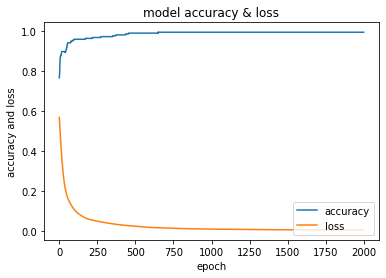

In [57]:
#Visualize the models accuracy and loss
plt.plot(history.history["acc"])
plt.plot(history.history["loss"])
plt.title("model accuracy & loss")
plt.ylabel("accuracy and loss")
plt.xlabel("epoch")
plt.legend(['accuracy', 'loss'], loc='lower right')
plt.show()

In [58]:
#Final shape of the training and testing dataset used in our model 
print("*******************************************************************")
print("Training data shape: ", X_train.shape)
print("Test data shape    : ", X_test.shape )
print("*******************************************************************")

*******************************************************************
Training data shape:  (228, 7)
Test data shape    :  (57, 7)
*******************************************************************


In [59]:
import warnings; warnings.simplefilter('ignore')

for model_file in glob.glob("*.model"):
  print("Model file: ", model_file)
  model = load_model(model_file)
  pred = model.predict(X_test)
  pred = [1 if y>=0.5 else 0 for y in pred] 
  scores = model.evaluate(X_test, y_test)
  print()
  print("Original  : {0}".format(", ".join([str(x) for x in y_test])))
  print()
  print("Predicted : {0}".format(", ".join([str(x) for x in pred])))
  print() 
  print("Scores    : loss = ", scores[0], " acc = ", scores[1])
  print("-------------------------------------------------------------------")
  print() 

Model file:  ckd.model
57/57 [==============================] - 0s 822us/sample - loss: 0.0120 - acc: 1.0000

Original  : 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0

Predicted : 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0

Scores    : loss =  0.012003485636230101  acc =  1.0
-------------------------------------------------------------------



In [ ]:
#Model Comparison
#Add layers 
model = Sequential()
model.add(Dense(200, input_dim=len(X.columns),
                    kernel_initializer=k.initializers.he_normal(seed=13), activation="relu"))
model.add(Dense(200,activation="relu"))
model.add(Dense(1, activation="hard_sigmoid"))